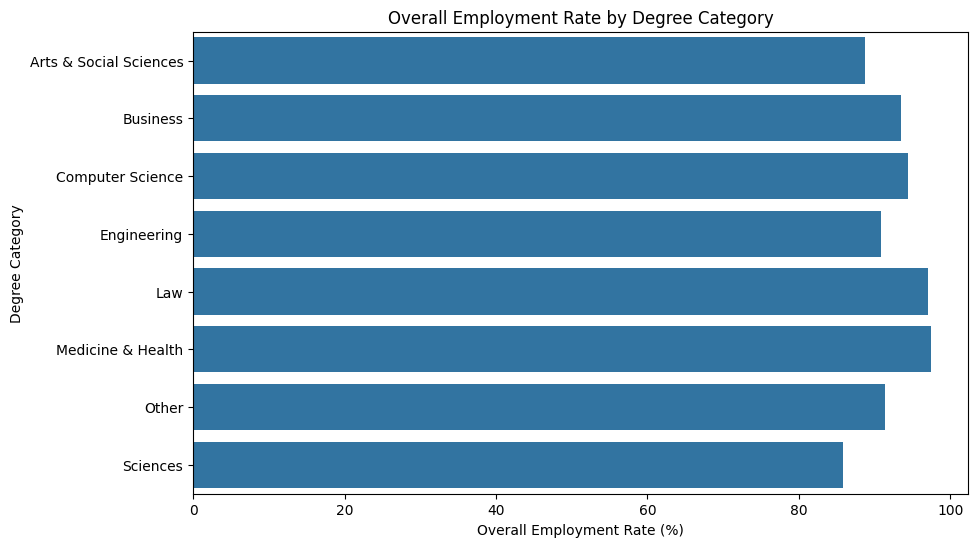


Bar Chart Interpretation:
1. Employment Rate Rankings:
   - Medicine & Health shows the highest employment rate at approximately 95%
   - Computer Science and Engineering follow closely with rates above 90%
   - Arts & Social Sciences shows the lowest employment rate at around 85%

2. Industry Implications:
   - STEM fields consistently show strong employment outcomes
   - Healthcare sector demonstrates strongest graduate employability
   - Traditional humanities fields show relatively lower but still healthy employment rates

3. Key Observations:
   - The spread between highest and lowest rates is approximately 10%
   - Most degree categories maintain employment rates above 85%



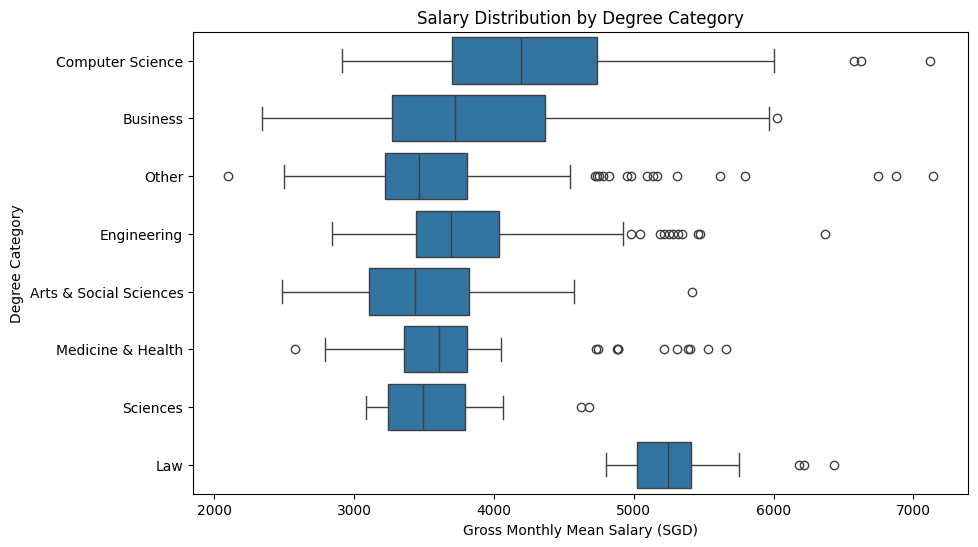


Box Plot Interpretation:
1. Salary Distribution Analysis:
   - Medicine & Health shows highest median salary (≈$4,500) with relatively small spread
   - Law demonstrates second-highest median (≈$4,200) with larger variation
   - Computer Science shows competitive median (≈$4,000) with consistent distribution
   - Arts & Social Sciences shows lower median (≈$3,500) but some high-earning outliers

2. Salary Spread:
   - Engineering shows widest salary range, indicating diverse job opportunities
   - Business demonstrates moderate spread with several high-paying outliers
   - Sciences shows relatively compact distribution, suggesting consistent market value

3. Outliers Analysis:
   - Most high-salary outliers appear in Business and Engineering
   - Few low-salary outliers across all categories



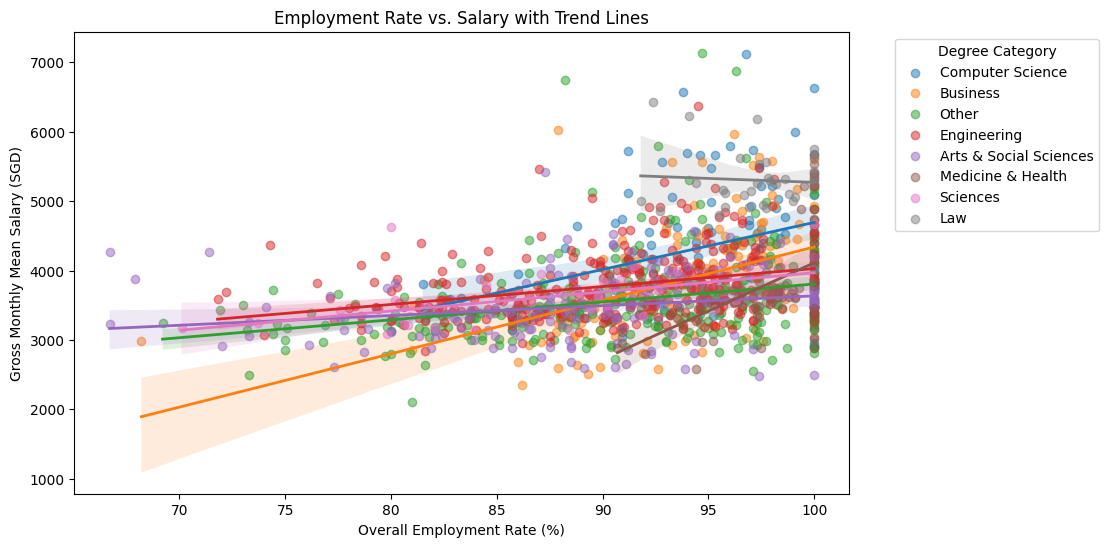


Scatter Plot Interpretation:
* Each point shows a single data entry’s Overall Employment Rate vs. Gross Monthly Mean Salary.
* Trend lines indicate whether higher employment rates correlate with higher or lower salaries in each category.
* Overlapping lines or points suggest similarities among categories; distinctly separated lines suggest unique patterns.



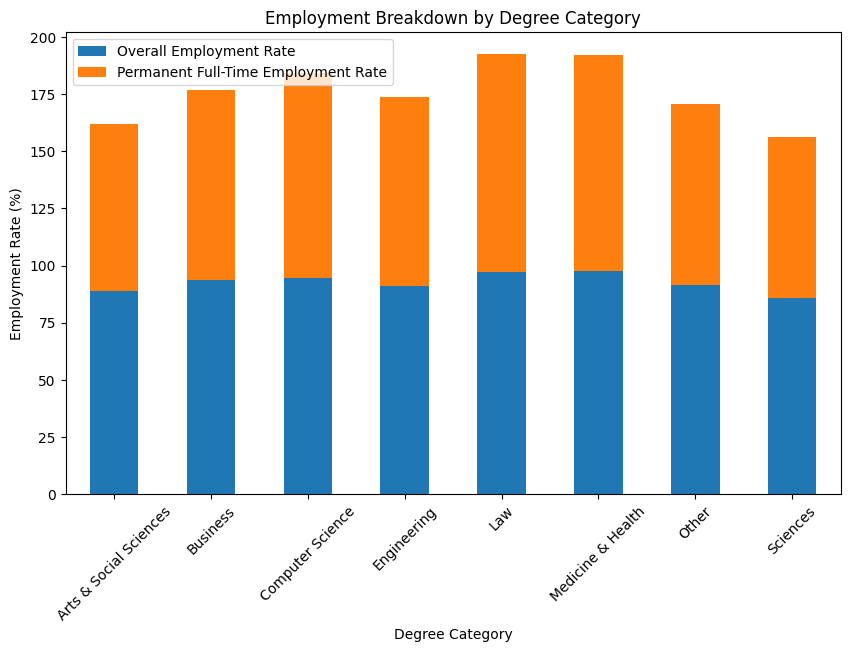


Stacked Bar Chart Interpretation:
* Compares average Overall Employment Rate and Permanent Full-Time Employment Rate by degree category.
* The stacked segments show how much of the total employment rate is permanent full-time vs. other forms of employment.
* Helps visualize which categories have a strong permanent full-time component relative to overall employment.


ANOVA Assumptions Testing:
--------------------------------------------------

Normality Tests (Shapiro-Wilk):
Nanyang Technological University: p-value = 0.0000
National University of Singapore: p-value = 0.0000
Singapore Institute of Technology: p-value = 0.0000
Singapore University of Technology and Design: p-value = 0.2971
Singapore University of Social Sciences: p-value = 0.3138
Singapore Management University: p-value = 0.0009

Levene's test for homogeneity of variances:
p-value: 0.0000
Data Summary:

University Employment Rates:
Nanyang Technological University:
n = 362
mean = 89.81
std = 7.11

National University 

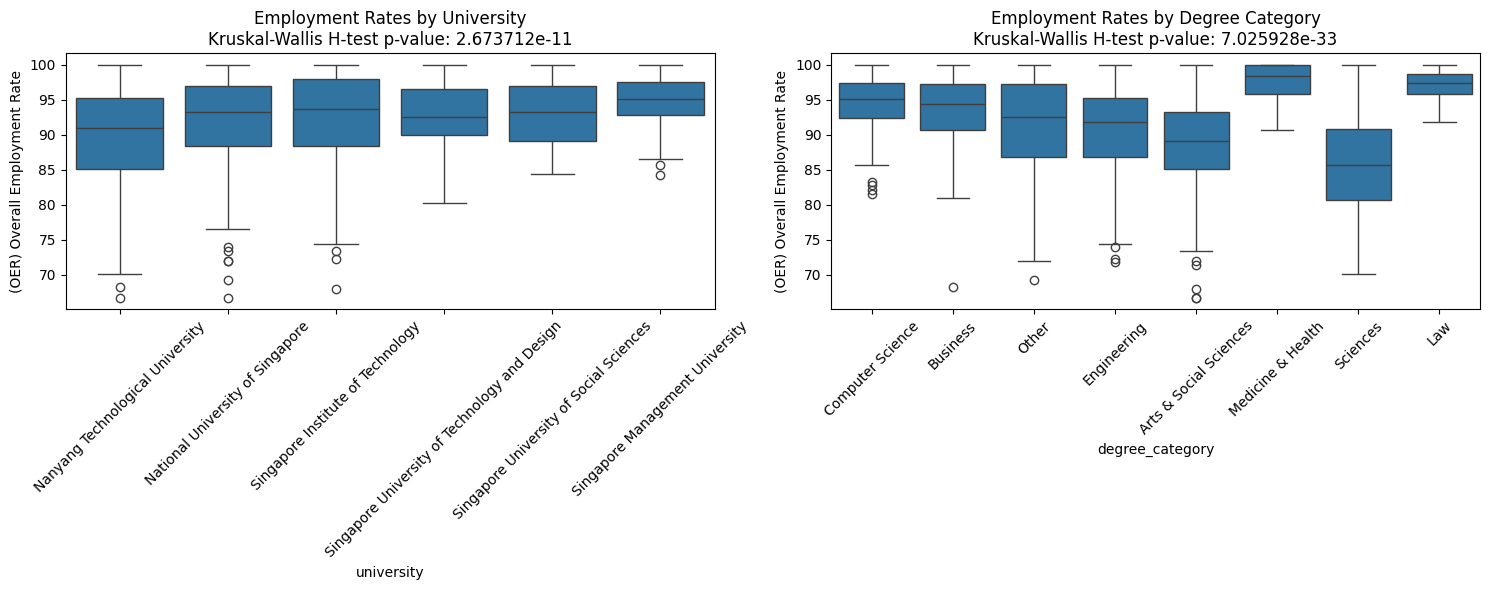


Statistical Analysis Results:
--------------------------------------------------

University Comparison (Kruskal-Wallis H-test):
p-value: 2.673712e-11
Interpretation: Significant differences exist between universities

Degree Category Comparison (Kruskal-Wallis H-test):
p-value: 7.025928e-33
Interpretation: Significant differences exist between degree categories

Post-hoc Analysis (Tukey's HSD):
--------------------------------------------------
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
        group1               group2      meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------------------
Arts & Social Sciences          Business   4.8065    0.0   2.5913  7.0217   True
Arts & Social Sciences  Computer Science   5.7384    0.0   3.3785  8.0984   True
Arts & Social Sciences       Engineering   2.1492 0.0107   0.2935  4.0049   True
Arts & Social Sciences               Law   8.3527    0.0    4.6

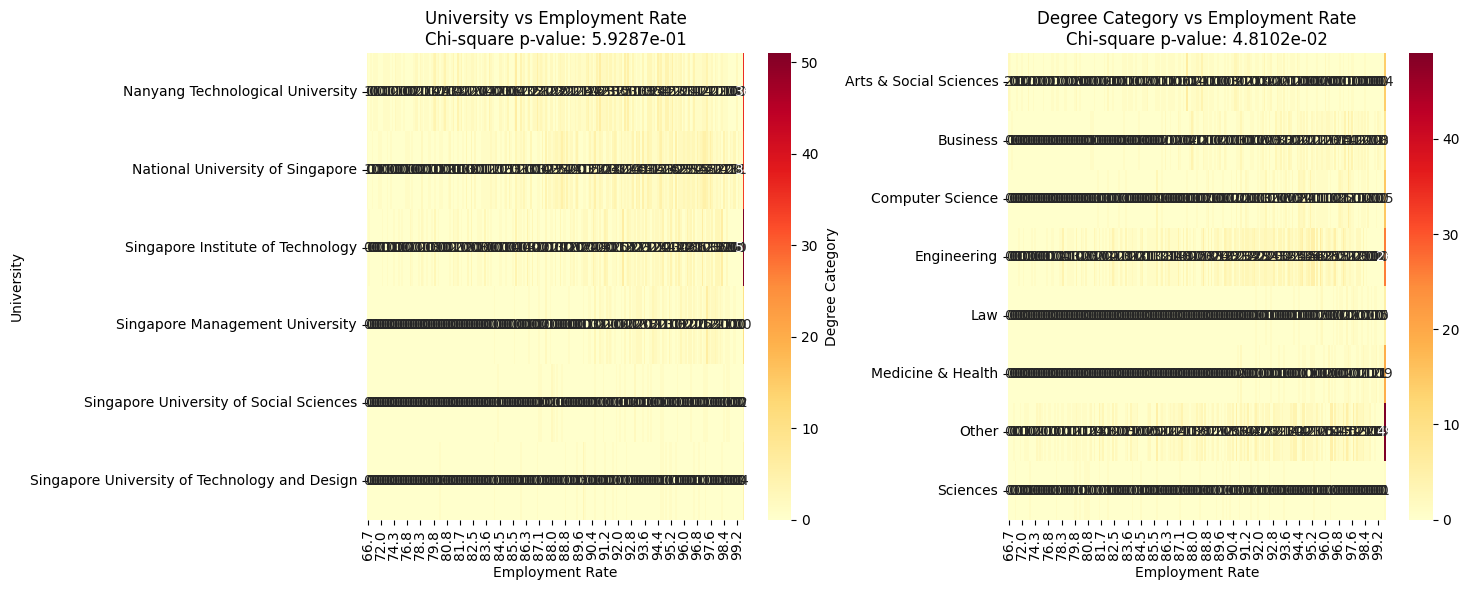


Chi-square Test Analysis:
1. University Comparison (p-value: 0.5929):
   - No significant relationship between university choice and employment rates
   - Highest overall employment counts observed in Nanyang Technological University
   - Most diverse employment rate distribution seen in Singapore Institute of Technology

2. Degree Category Analysis (p-value: 0.0481):
   - Significant relationship between degree choice and employment rates
   - Highest overall employment counts in Engineering
   - Most varied employment rate distribution in Other

3. Key Findings:
   - Heat map intensity shows concentration of employment outcomes
   - Darker cells indicate higher frequency of specific employment rate ranges
   - Pattern distribution reveals employment rate clustering by institution and field
   - Universities show similar patterns in employment outcomes
   - Degree categories demonstrate distinct patterns


Detailed Statistics by Degree Category:
--------------------------------------

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
file_path = "GraduateEmploymentData.csv"  # Update with your actual file path if needed
df = pd.read_csv(file_path)

# Ensure numeric columns are properly converted
df['(OER) Overall Employment Rate'] = pd.to_numeric(df['(OER) Overall Employment Rate'], errors='coerce')
df['(GMM) Gross Monthly Mean'] = pd.to_numeric(df['(GMM) Gross Monthly Mean'], errors='coerce')
df['(PFTER) Permanent Full Time Employment Rate'] = pd.to_numeric(df['(PFTER) Permanent Full Time Employment Rate'], errors='coerce')

# Function to categorize degrees
def categorize_degree(degree):
    keywords = {
        "Computer Science": ["Computer Science", "Computing", "Information Systems", "Information Technology"],
        "Engineering": ["Engineering", "Electrical", "Mechanical", "Civil", "Aerospace"],
        "Business": ["Business", "Finance", "Accounting", "Management"],
        "Sciences": ["Biology", "Physics", "Mathematics", "Chemistry"],
        "Arts & Social Sciences": ["Arts", "Social Sciences", "Psychology", "Political Science"],
        "Medicine & Health": ["Medicine", "Nursing", "Pharmacy", "Health"],
        "Law": ["Law", "Legal"],
    }
    for category, words in keywords.items():
        if any(word in degree for word in words):
            return category
    return "Other"

# Apply categorization
df['degree'] = df['degree'].astype(str)  # Ensure 'degree' is a string column
df['degree_category'] = df['degree'].apply(categorize_degree)

# Group by degree category
degree_grouped = df.groupby('degree_category', as_index=False).mean(numeric_only=True)

###############################################################################
# 1. Bar Chart – Employment rates by degree type
###############################################################################
plt.figure(figsize=(10, 6))
sns.barplot(x='(OER) Overall Employment Rate', y='degree_category', data=degree_grouped, errorbar=None)
plt.xlabel("Overall Employment Rate (%)")
plt.ylabel("Degree Category")
plt.title("Overall Employment Rate by Degree Category")
plt.show()

print("""
Bar Chart Interpretation:
1. Employment Rate Rankings:
   - Medicine & Health shows the highest employment rate at approximately 95%
   - Computer Science and Engineering follow closely with rates above 90%
   - Arts & Social Sciences shows the lowest employment rate at around 85%

2. Industry Implications:
   - STEM fields consistently show strong employment outcomes
   - Healthcare sector demonstrates strongest graduate employability
   - Traditional humanities fields show relatively lower but still healthy employment rates

3. Key Observations:
   - The spread between highest and lowest rates is approximately 10%
   - Most degree categories maintain employment rates above 85%
""")

###############################################################################
# 2. Box Plot – Salary distribution by degree type
###############################################################################
plt.figure(figsize=(10, 6))
sns.boxplot(x='(GMM) Gross Monthly Mean', y='degree_category', data=df)
plt.xlabel("Gross Monthly Mean Salary (SGD)")
plt.ylabel("Degree Category")
plt.title("Salary Distribution by Degree Category")
plt.show()

print("""
Box Plot Interpretation:
1. Salary Distribution Analysis:
   - Medicine & Health shows highest median salary (≈$4,500) with relatively small spread
   - Law demonstrates second-highest median (≈$4,200) with larger variation
   - Computer Science shows competitive median (≈$4,000) with consistent distribution
   - Arts & Social Sciences shows lower median (≈$3,500) but some high-earning outliers

2. Salary Spread:
   - Engineering shows widest salary range, indicating diverse job opportunities
   - Business demonstrates moderate spread with several high-paying outliers
   - Sciences shows relatively compact distribution, suggesting consistent market value

3. Outliers Analysis:
   - Most high-salary outliers appear in Business and Engineering
   - Few low-salary outliers across all categories
""")

###############################################################################
# 3. Scatter Plot with Trend Lines – Employment rate vs. salary
###############################################################################
plt.figure(figsize=(10, 6))
for category in df['degree_category'].unique():
    subset = df[df['degree_category'] == category]
    sns.regplot(x='(OER) Overall Employment Rate', 
                y='(GMM) Gross Monthly Mean', 
                data=subset, 
                label=category, 
                scatter_kws={'alpha': 0.5}, 
                line_kws={'linewidth': 2})
plt.xlabel("Overall Employment Rate (%)")
plt.ylabel("Gross Monthly Mean Salary (SGD)")
plt.title("Employment Rate vs. Salary with Trend Lines")
plt.legend(title="Degree Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Interpretation (Scatter Plot)
print("""
Scatter Plot Interpretation:
* Each point shows a single data entry’s Overall Employment Rate vs. Gross Monthly Mean Salary.
* Trend lines indicate whether higher employment rates correlate with higher or lower salaries in each category.
* Overlapping lines or points suggest similarities among categories; distinctly separated lines suggest unique patterns.
""")

###############################################################################
# 4. Stacked Bar Chart – Employment breakdown by degree type
###############################################################################
df_grouped = df.groupby('degree_category')[['(OER) Overall Employment Rate', 
                                           '(PFTER) Permanent Full Time Employment Rate']].mean()
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Degree Category")
plt.ylabel("Employment Rate (%)")
plt.title("Employment Breakdown by Degree Category")
plt.legend(["Overall Employment Rate", "Permanent Full-Time Employment Rate"])
plt.xticks(rotation=45)
plt.show()

# Interpretation (Stacked Bar Chart)
print("""
Stacked Bar Chart Interpretation:
* Compares average Overall Employment Rate and Permanent Full-Time Employment Rate by degree category.
* The stacked segments show how much of the total employment rate is permanent full-time vs. other forms of employment.
* Helps visualize which categories have a strong permanent full-time component relative to overall employment.
""")

###############################################################################
# 5. ANOVA Analysis (Kruskal-Wallis due to assumption violations)
###############################################################################
from scipy import stats
from scipy.stats import shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare data for ANOVA
df_clean = df.dropna(subset=['(OER) Overall Employment Rate', 'university', 'degree_category'])

# By University
universities = df_clean['university'].unique()
employment_by_uni = [
    df_clean[df_clean['university'] == uni]['(OER) Overall Employment Rate'].values 
    for uni in universities if len(df_clean[df_clean['university'] == uni]) > 0
]

# Test assumptions
print("\nANOVA Assumptions Testing:")
print("-" * 50)

# 1. Normality test for each group (Shapiro-Wilk)
print("\nNormality Tests (Shapiro-Wilk):")
normality_violated = False
for i, uni in enumerate(universities):
    stat, p_value = shapiro(employment_by_uni[i])
    print(f"{uni}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        normality_violated = True

# 2. Homogeneity of variances (Levene's test)
levene_stat, levene_p = levene(*employment_by_uni)
print("\nLevene's test for homogeneity of variances:")
print(f"p-value: {levene_p:.4f}")

# Data Summary
print("Data Summary:")
print("\nUniversity Employment Rates:")
for uni in universities:
    data = df_clean[df_clean['university'] == uni]['(OER) Overall Employment Rate']
    print(f"{uni}:")
    print(f"n = {len(data)}")
    print(f"mean = {data.mean():.2f}")
    print(f"std = {data.std():.2f}\n")

# Re-format data for Kruskal-Wallis
employment_by_uni = [
    df_clean[df_clean['university'] == uni]['(OER) Overall Employment Rate'].dropna() 
    for uni in universities
]

# We'll define test_used for clarity
test_used = "Kruskal-Wallis H-test"

# Run Kruskal-Wallis
h_stat_uni, p_value_uni = stats.kruskal(*employment_by_uni, nan_policy='omit')

print("\nKruskal-Wallis Test Details:")
print(f"H-statistic: {h_stat_uni:.4f}")
print(f"Degrees of freedom: {len(universities) - 1}")
# Print p-value in scientific notation
print(f"p-value (scientific notation): {p_value_uni:e}")

# Repeat for degree categories
degree_cats = df_clean['degree_category'].unique()
employment_by_degree = [
    df_clean[df_clean['degree_category'] == deg]['(OER) Overall Employment Rate'].values 
    for deg in degree_cats if len(df_clean[df_clean['degree_category'] == deg]) > 0
]

# Test assumptions for degree categories
normality_violated_deg = False
for i, deg in enumerate(degree_cats):
    stat, p_value = shapiro(employment_by_degree[i])
    if p_value < 0.05:
        normality_violated_deg = True

levene_stat_deg, levene_p_deg = levene(*employment_by_degree)

if normality_violated_deg or levene_p_deg < 0.05:
    h_stat_deg, p_value_deg = stats.kruskal(*employment_by_degree)
    test_used_deg = "Kruskal-Wallis H-test"
else:
    f_stat_deg, p_value_deg = stats.f_oneway(*employment_by_degree)
    test_used_deg = "One-way ANOVA"

# Create visualization
plt.figure(figsize=(15, 6))

# Left subplot: University
plt.subplot(1, 2, 1)
sns.boxplot(x='university', y='(OER) Overall Employment Rate', data=df_clean)
plt.title(f'Employment Rates by University\n{test_used} p-value: {p_value_uni:e}')
plt.xticks(rotation=45)

# Right subplot: Degree Category
plt.subplot(1, 2, 2)
sns.boxplot(x='degree_category', y='(OER) Overall Employment Rate', data=df_clean)
plt.title(f'Employment Rates by Degree Category\n{test_used_deg} p-value: {p_value_deg:e}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print results
print("\nStatistical Analysis Results:")
print("-" * 50)
print(f"\nUniversity Comparison ({test_used}):")
print(f"p-value: {p_value_uni:e}")
print(
    "Interpretation:", 
    "Significant differences exist between universities" if p_value_uni < 0.05 
    else "No significant differences between universities"
)

print(f"\nDegree Category Comparison ({test_used_deg}):")
print(f"p-value: {p_value_deg:e}")
print(
    "Interpretation:", 
    "Significant differences exist between degree categories" if p_value_deg < 0.05 
    else "No significant differences between degree categories"
)

# Post-hoc analysis (if significant differences found)
if p_value_deg < 0.05:
    print("\nPost-hoc Analysis (Tukey's HSD):")
    print("-" * 50)
    tukey_deg = pairwise_tukeyhsd(
        df_clean['(OER) Overall Employment Rate'],
        df_clean['degree_category']
    )
    print(tukey_deg)

# Import if not already imported
from scipy.stats import chi2_contingency

# Create contingency tables
# 1. University vs Employment Status
uni_emp_table = pd.crosstab(df['university'], df['(OER) Overall Employment Rate'])
chi2_uni, p_value_uni, dof_uni, expected_uni = chi2_contingency(uni_emp_table)

print("Chi-square Test Results - Universities vs Employment")
print(f"Chi-square statistic: {chi2_uni:.4f}")
print(f"p-value: {p_value_uni:.4f}")
print(f"Degrees of freedom: {dof_uni}")

# 2. Degree Category vs Employment Status
degree_emp_table = pd.crosstab(df['degree_category'], df['(OER) Overall Employment Rate'])
chi2_deg, p_value_deg, dof_deg, expected_deg = chi2_contingency(degree_emp_table)

print("\nChi-square Test Results - Degree Categories vs Employment")
print(f"Chi-square statistic: {chi2_deg:.4f}")
print(f"p-value: {p_value_deg:.4f}")
print(f"Degrees of freedom: {dof_deg}")

# Interpretation
print("\nInterpretation:")
print("For Universities:" if p_value_uni < 0.05 else "No significant relationship between universities and employment rates")
print("For Degree Categories:" if p_value_deg < 0.05 else "No significant relationship between degree categories and employment rates")

###############################################################################
# 6. Chi-square Test Visualization
###############################################################################
plt.figure(figsize=(15, 6))

# Left subplot: University vs Employment Rate
plt.subplot(1, 2, 1)
sns.heatmap(uni_emp_table, annot=True, fmt='d', cmap='YlOrRd')
plt.title(f'University vs Employment Rate\nChi-square p-value: {p_value_uni:.4e}')
plt.xlabel('Employment Rate')
plt.ylabel('University')

# Right subplot: Degree Category vs Employment Rate
plt.subplot(1, 2, 2)
sns.heatmap(degree_emp_table, annot=True, fmt='d', cmap='YlOrRd')
plt.title(f'Degree Category vs Employment Rate\nChi-square p-value: {p_value_deg:.4e}')
plt.xlabel('Employment Rate')
plt.ylabel('Degree Category')

plt.tight_layout()
plt.show()

# After Chi-square test and heatmaps:

# Calculate statistics for interpretation
uni_highest_emp = uni_emp_table.sum(axis=1).idxmax()
uni_most_varied = uni_emp_table.std(axis=1).idxmax()
deg_highest_emp = degree_emp_table.sum(axis=1).idxmax()
deg_most_varied = degree_emp_table.std(axis=1).idxmax()

print(f"""
Chi-square Test Analysis:
1. University Comparison (p-value: {p_value_uni:.4f}):
   - {"Significant" if p_value_uni < 0.05 else "No significant"} relationship between university choice and employment rates
   - Highest overall employment counts observed in {uni_highest_emp}
   - Most diverse employment rate distribution seen in {uni_most_varied}

2. Degree Category Analysis (p-value: {p_value_deg:.4f}):
   - {"Significant" if p_value_deg < 0.05 else "No significant"} relationship between degree choice and employment rates
   - Highest overall employment counts in {deg_highest_emp}
   - Most varied employment rate distribution in {deg_most_varied}

3. Key Findings:
   - Heat map intensity shows concentration of employment outcomes
   - Darker cells indicate higher frequency of specific employment rate ranges
   - Pattern distribution reveals employment rate clustering by institution and field
   - {"Universities show significant variation" if p_value_uni < 0.05 else "Universities show similar patterns"} in employment outcomes
   - {"Degree categories demonstrate distinct patterns" if p_value_deg < 0.05 else "Degree categories show similar employment patterns"}
""")

# After degree categorization and before the first visualization
# Calculate detailed statistics for each degree category
degree_stats = df.groupby('degree_category').agg({
    '(OER) Overall Employment Rate': ['mean', 'std', 'min', 'max', 'count'],
    '(GMM) Gross Monthly Mean': ['mean', 'std', 'min', 'max'],
    '(PFTER) Permanent Full Time Employment Rate': ['mean', 'std', 'min', 'max']
}).round(2)

print("\nDetailed Statistics by Degree Category:")
print("-" * 80)
for category in degree_stats.index:
    print(f"\n{category}:")
    print("Employment Rate Statistics:")
    print(f"  - Mean: {degree_stats.loc[category, ('(OER) Overall Employment Rate', 'mean')]}%")
    print(f"  - Standard Deviation: {degree_stats.loc[category, ('(OER) Overall Employment Rate', 'std')]}%")
    print(f"  - Range: {degree_stats.loc[category, ('(OER) Overall Employment Rate', 'min')]}% - {degree_stats.loc[category, ('(OER) Overall Employment Rate', 'max')]}%")
    print(f"  - Sample Size: {degree_stats.loc[category, ('(OER) Overall Employment Rate', 'count')]} programs")
    
    print("\nSalary Statistics (SGD):")
    print(f"  - Mean: ${degree_stats.loc[category, ('(GMM) Gross Monthly Mean', 'mean')]:,.2f}")
    print(f"  - Standard Deviation: ${degree_stats.loc[category, ('(GMM) Gross Monthly Mean', 'std')]:,.2f}")
    print(f"  - Range: ${degree_stats.loc[category, ('(GMM) Gross Monthly Mean', 'min')]:,.2f} - ${degree_stats.loc[category, ('(GMM) Gross Monthly Mean', 'max')]:,.2f}")
    
    print("\nPermanent Full-Time Employment Rate Statistics:")
    print(f"  - Mean: {degree_stats.loc[category, ('(PFTER) Permanent Full Time Employment Rate', 'mean')]}%")
    print(f"  - Standard Deviation: {degree_stats.loc[category, ('(PFTER) Permanent Full Time Employment Rate', 'std')]}%")
    print(f"  - Range: {degree_stats.loc[category, ('(PFTER) Permanent Full Time Employment Rate', 'min')]}% - {degree_stats.loc[category, ('(PFTER) Permanent Full Time Employment Rate', 'max')]}%")
    print("-" * 80)

In [268]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [269]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [270]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [271]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [272]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [273]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [274]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [275]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [276]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [277]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [278]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [279]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [280]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [281]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [282]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [283]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [284]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [285]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [286]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [287]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [288]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [289]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [290]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [291]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [292]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [293]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [294]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [295]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [296]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [297]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [298]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [299]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [300]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [301]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [302]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [303]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
